Loading mouse disorder data...
Total phosphorylation sites: 30442

Phosphorylation sites in disordered regions: 19517
Phosphorylation sites in ordered regions: 9967
Phosphorylation sites with no disorder data: 958

Percentages (excluding no data):
Disordered regions: 66.2%
Ordered regions: 33.8%


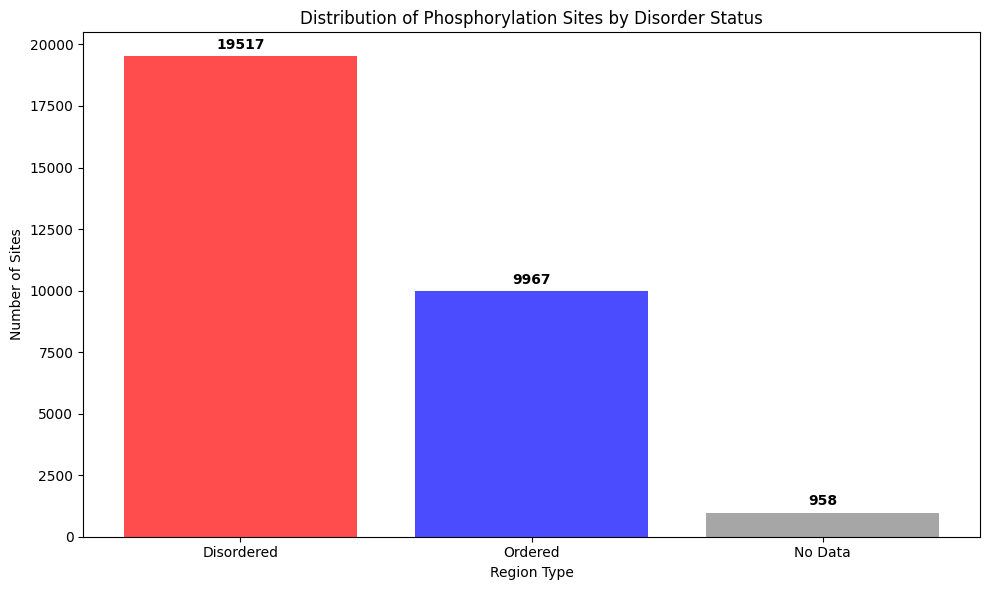

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mouse disorder data
print("Loading mouse disorder data...")
df_mouse = pd.read_csv('../data/processed/mouse/full_disorder.csv')

print(f"Total phosphorylation sites: {len(df_mouse)}")

# Count phosphorylations by disorder status
disordered_count = len(df_mouse[df_mouse['disordered?'] == 1])
ordered_count = len(df_mouse[df_mouse['disordered?'] == 0])
no_data_count = len(df_mouse[df_mouse['disordered?'].isna()])

print(f"\nPhosphorylation sites in disordered regions: {disordered_count}")
print(f"Phosphorylation sites in ordered regions: {ordered_count}")
print(f"Phosphorylation sites with no disorder data: {no_data_count}")

# Calculate percentages
total_with_data = disordered_count + ordered_count
if total_with_data > 0:
    disordered_pct = (disordered_count / total_with_data) * 100
    ordered_pct = (ordered_count / total_with_data) * 100
    
    print(f"\nPercentages (excluding no data):")
    print(f"Disordered regions: {disordered_pct:.1f}%")
    print(f"Ordered regions: {ordered_pct:.1f}%")

# Create a simple bar chart
plt.figure(figsize=(10, 6))
categories = ['Disordered', 'Ordered', 'No Data']
counts = [disordered_count, ordered_count, no_data_count]
colors = ['red', 'blue', 'gray']

bars = plt.bar(categories, counts, color=colors, alpha=0.7)
plt.title('Distribution of Phosphorylation Sites by Disorder Status')
plt.ylabel('Number of Sites')
plt.xlabel('Region Type')

# Add value labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(counts),
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Loading rat disorder data...
Total phosphorylation sites: 23004

Phosphorylation sites in disordered regions: 13897
Phosphorylation sites in ordered regions: 7136
Phosphorylation sites with no disorder data: 1971

Percentages (excluding no data):
Disordered regions: 66.1%
Ordered regions: 33.9%


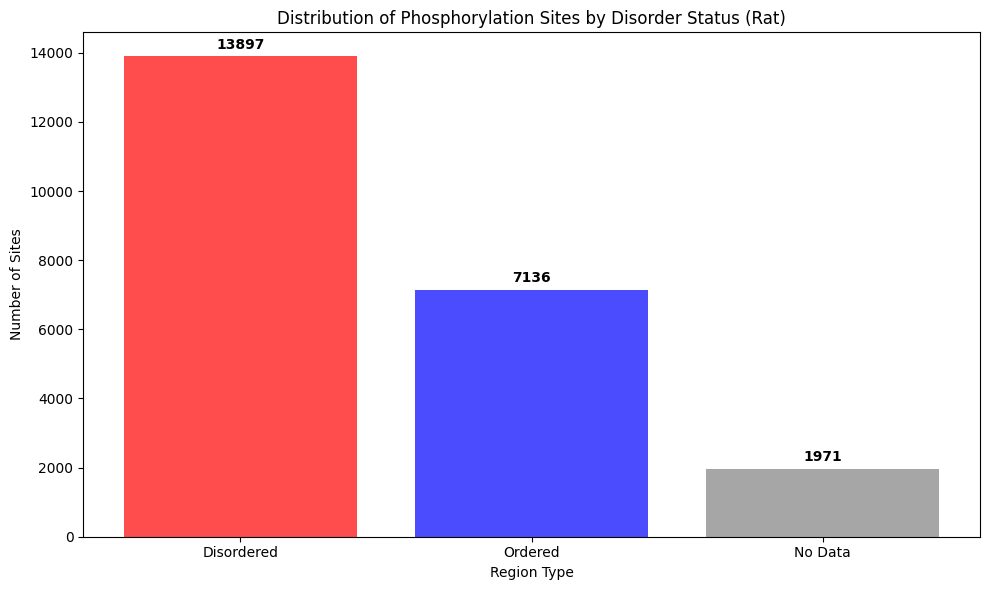

In [5]:
# Load the rat disorder data
print("Loading rat disorder data...")
df_rat = pd.read_csv('../data/processed/rat/full_disorder.csv')

print(f"Total phosphorylation sites: {len(df_rat)}")

# Count phosphorylations by disorder status
disordered_count_rat = len(df_rat[df_rat['disordered?'] == 1])
ordered_count_rat = len(df_rat[df_rat['disordered?'] == 0])
no_data_count_rat = len(df_rat[df_rat['disordered?'].isna()])

print(f"\nPhosphorylation sites in disordered regions: {disordered_count_rat}")
print(f"Phosphorylation sites in ordered regions: {ordered_count_rat}")
print(f"Phosphorylation sites with no disorder data: {no_data_count_rat}")

# Calculate percentages
total_with_data_rat = disordered_count_rat + ordered_count_rat
if total_with_data_rat > 0:
    disordered_pct_rat = (disordered_count_rat / total_with_data_rat) * 100
    ordered_pct_rat = (ordered_count_rat / total_with_data_rat) * 100
    
    print(f"\nPercentages (excluding no data):")
    print(f"Disordered regions: {disordered_pct_rat:.1f}%")
    print(f"Ordered regions: {ordered_pct_rat:.1f}%")

# Create a simple bar chart for rat data
plt.figure(figsize=(10, 6))
categories = ['Disordered', 'Ordered', 'No Data']
counts = [disordered_count_rat, ordered_count_rat, no_data_count_rat]
colors = ['red', 'blue', 'gray']

bars = plt.bar(categories, counts, color=colors, alpha=0.7)
plt.title('Distribution of Phosphorylation Sites by Disorder Status (Rat)')
plt.ylabel('Number of Sites')
plt.xlabel('Region Type')

# Add value labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(counts),
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...
Found 6015 PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...
Processed 6000 files...

Processed 6015 PUNCH2 files
Total S/T/Y residues in disordered regions: 264135
Total S/T/Y residues in ordered regions: 541898
Total S/T/Y residues: 806033

Percentages of all S/T/Y residues:
Disordered regions: 32.8%
Ordered regions: 67.2%


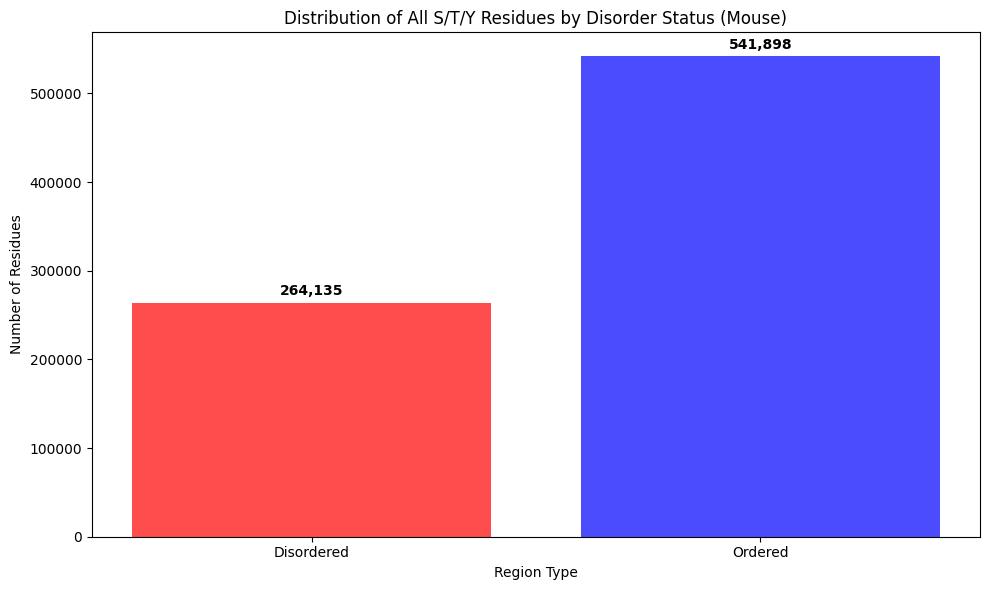

In [6]:
import os
import glob

# Count all S, T, Y residues from PUNCH2 results for mouse
print("Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...")

punch2_dir = "../outputs/punch2/Punch2_results_mouse"
punch2_files = glob.glob(os.path.join(punch2_dir, "*.csv"))

if not punch2_files:
    print(f"Error: No PUNCH2 files found in {punch2_dir}")
else:
    print(f"Found {len(punch2_files)} PUNCH2 result files")
    
    # Count all S/T/Y residues by disorder status
    total_sty_disordered = 0
    total_sty_ordered = 0
    total_sty_residues = 0
    files_processed = 0
    
    for file_path in punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    
                    # Check if it's S, T, or Y
                    if amino_acid in ['S', 'T', 'Y']:
                        total_sty_residues += 1
                        
                        # Check disorder status (1 = disordered, 0 = ordered)
                        if disorder_prediction == '1':
                            total_sty_disordered += 1
                        elif disorder_prediction == '0':
                            total_sty_ordered += 1
            
            files_processed += 1
            if files_processed % 1000 == 0:
                print(f"Processed {files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {files_processed} PUNCH2 files")
    print(f"Total S/T/Y residues in disordered regions: {total_sty_disordered}")
    print(f"Total S/T/Y residues in ordered regions: {total_sty_ordered}")
    print(f"Total S/T/Y residues: {total_sty_residues}")
    
    # Calculate percentages
    if total_sty_residues > 0:
        disordered_pct = (total_sty_disordered / total_sty_residues) * 100
        ordered_pct = (total_sty_ordered / total_sty_residues) * 100
        
        print(f"\nPercentages of all S/T/Y residues:")
        print(f"Disordered regions: {disordered_pct:.1f}%")
        print(f"Ordered regions: {ordered_pct:.1f}%")
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    categories = ['Disordered', 'Ordered']
    counts = [total_sty_disordered, total_sty_ordered]
    colors = ['red', 'blue']
    
    bars = plt.bar(categories, counts, color=colors, alpha=0.7)
    plt.title('Distribution of All S/T/Y Residues by Disorder Status (Mouse)')
    plt.ylabel('Number of Residues')
    plt.xlabel('Region Type')
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(counts),
                 f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


Analyzing all S, T, Y residues from PUNCH2 results (Rat)...
Found 5772 PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...

Processed 5772 PUNCH2 files
Total S/T/Y residues in disordered regions: 246567
Total S/T/Y residues in ordered regions: 519128
Total S/T/Y residues: 765695

Percentages of all S/T/Y residues:
Disordered regions: 32.2%
Ordered regions: 67.8%


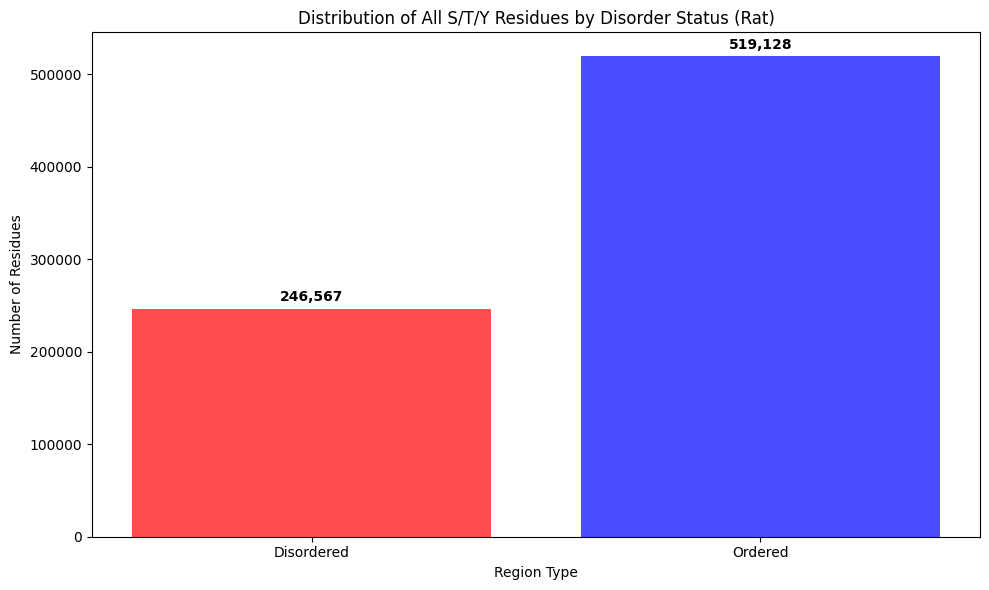

In [7]:
# Count all S, T, Y residues from PUNCH2 results for rat
print("Analyzing all S, T, Y residues from PUNCH2 results (Rat)...")

punch2_dir = "../outputs/punch2/Punch2_results_rat"
punch2_files = glob.glob(os.path.join(punch2_dir, "*.csv"))

if not punch2_files:
    print(f"Error: No PUNCH2 files found in {punch2_dir}")
else:
    print(f"Found {len(punch2_files)} PUNCH2 result files")
    
    # Count all S/T/Y residues by disorder status
    total_sty_disordered_rat = 0
    total_sty_ordered_rat = 0
    total_sty_residues_rat = 0
    files_processed = 0
    
    for file_path in punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    
                    # Check if it's S, T, or Y
                    if amino_acid in ['S', 'T', 'Y']:
                        total_sty_residues_rat += 1
                        
                        # Check disorder status (1 = disordered, 0 = ordered)
                        if disorder_prediction == '1':
                            total_sty_disordered_rat += 1
                        elif disorder_prediction == '0':
                            total_sty_ordered_rat += 1
            
            files_processed += 1
            if files_processed % 1000 == 0:
                print(f"Processed {files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {files_processed} PUNCH2 files")
    print(f"Total S/T/Y residues in disordered regions: {total_sty_disordered_rat}")
    print(f"Total S/T/Y residues in ordered regions: {total_sty_ordered_rat}")
    print(f"Total S/T/Y residues: {total_sty_residues_rat}")
    
    # Calculate percentages
    if total_sty_residues_rat > 0:
        disordered_pct_rat = (total_sty_disordered_rat / total_sty_residues_rat) * 100
        ordered_pct_rat = (total_sty_ordered_rat / total_sty_residues_rat) * 100
        
        print(f"\nPercentages of all S/T/Y residues:")
        print(f"Disordered regions: {disordered_pct_rat:.1f}%")
        print(f"Ordered regions: {ordered_pct_rat:.1f}%")
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    categories = ['Disordered', 'Ordered']
    counts = [total_sty_disordered_rat, total_sty_ordered_rat]
    colors = ['red', 'blue']
    
    bars = plt.bar(categories, counts, color=colors, alpha=0.7)
    plt.title('Distribution of All S/T/Y Residues by Disorder Status (Rat)')
    plt.ylabel('Number of Residues')
    plt.xlabel('Region Type')
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(counts),
                 f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


Calculating phosphorylation enrichment for mouse data...
Using values from previous cells:
Phosphorylated sites in disordered regions: 19517
Phosphorylated sites in ordered regions: 9967
Total S/T/Y residues in disordered regions: 264135
Total S/T/Y residues in ordered regions: 541898

Calculating phosphorylation enrichment...
Percentage of phosphorylated residues in disordered regions: 7.389%
  (19517 phosphorylated out of 264135 total S/T/Y residues)
Percentage of phosphorylated residues in ordered regions: 1.839%
  (9967 phosphorylated out of 541898 total S/T/Y residues)

Enrichment ratio (disordered/ordered): 4.02x
→ Phosphorylation is 4.02x more enriched in disordered regions

Creating visualization...


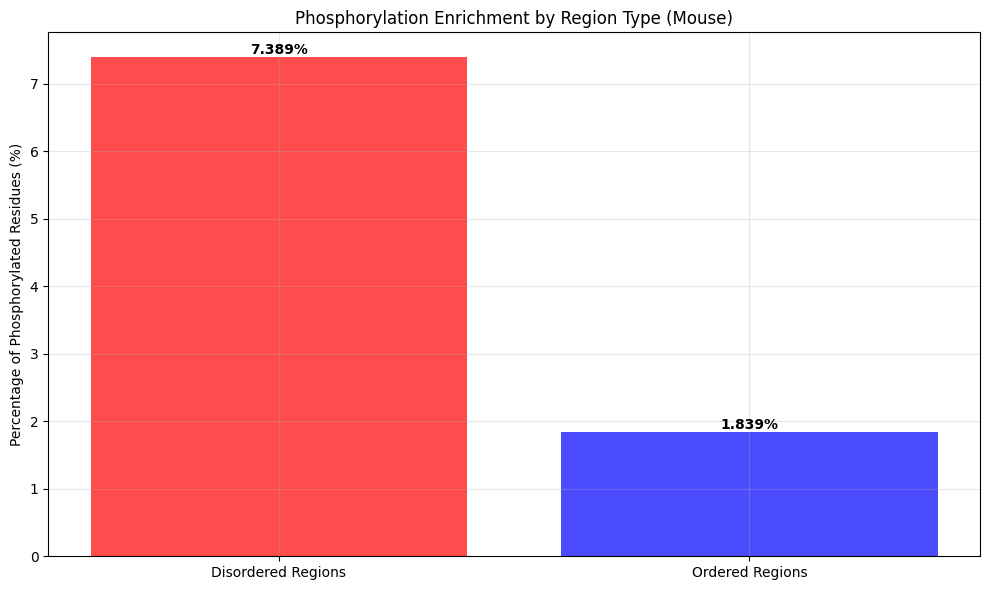


SUMMARY:
Phosphorylation enrichment in disordered regions: 7.389%
Phosphorylation enrichment in ordered regions: 1.839%
Enrichment ratio: 4.02x


In [12]:
import numpy as np

# Calculate phosphorylation enrichment for mouse data using values from previous cells
print("Calculating phosphorylation enrichment for mouse data...")
print("=" * 60)

# Use values from previous cells (assuming they were run)
# From cell 1: disordered_count, ordered_count
# From cell 3: total_sty_disordered, total_sty_ordered

print(f"Using values from previous cells:")
print(f"Phosphorylated sites in disordered regions: {disordered_count}")
print(f"Phosphorylated sites in ordered regions: {ordered_count}")
print(f"Total S/T/Y residues in disordered regions: {total_sty_disordered}")
print(f"Total S/T/Y residues in ordered regions: {total_sty_ordered}")

# Calculate enrichment percentages
print("\nCalculating phosphorylation enrichment...")

# Percentage of phosphorylated residues in disordered regions
if total_sty_disordered > 0:
    phospho_in_disordered_pct = (disordered_count / total_sty_disordered) * 100
    print(f"Percentage of phosphorylated residues in disordered regions: {phospho_in_disordered_pct:.3f}%")
    print(f"  ({disordered_count} phosphorylated out of {total_sty_disordered} total S/T/Y residues)")
else:
    phospho_in_disordered_pct = 0
    print("No S/T/Y residues found in disordered regions")

# Percentage of phosphorylated residues in ordered regions
if total_sty_ordered > 0:
    phospho_in_ordered_pct = (ordered_count / total_sty_ordered) * 100
    print(f"Percentage of phosphorylated residues in ordered regions: {phospho_in_ordered_pct:.3f}%")
    print(f"  ({ordered_count} phosphorylated out of {total_sty_ordered} total S/T/Y residues)")
else:
    phospho_in_ordered_pct = 0
    print("No S/T/Y residues found in ordered regions")

# Calculate enrichment ratio
if phospho_in_ordered_pct > 0:
    enrichment_ratio = phospho_in_disordered_pct / phospho_in_ordered_pct
    print(f"\nEnrichment ratio (disordered/ordered): {enrichment_ratio:.2f}x")
    if enrichment_ratio > 1:
        print(f"→ Phosphorylation is {enrichment_ratio:.2f}x more enriched in disordered regions")
    elif enrichment_ratio < 1:
        print(f"→ Phosphorylation is {1/enrichment_ratio:.2f}x more enriched in ordered regions")
    else:
        print("→ Phosphorylation shows equal enrichment in both regions")

# Create visualization
print("\nCreating visualization...")
plt.figure(figsize=(10, 6))

# Comparison of phosphorylation percentages
categories = ['Disordered Regions', 'Ordered Regions']
phospho_percentages = [phospho_in_disordered_pct, phospho_in_ordered_pct]

bars = plt.bar(categories, phospho_percentages, color=['red', 'blue'], alpha=0.7)
plt.ylabel('Percentage of Phosphorylated Residues (%)')
plt.title('Phosphorylation Enrichment by Region Type (Mouse)')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, pct in zip(bars, phospho_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{pct:.3f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nSUMMARY:")
print(f"Phosphorylation enrichment in disordered regions: {phospho_in_disordered_pct:.3f}%")
print(f"Phosphorylation enrichment in ordered regions: {phospho_in_ordered_pct:.3f}%")
print(f"Enrichment ratio: {enrichment_ratio:.2f}x")


Calculating phosphorylation enrichment for rat data...
Using values from previous cells:
Phosphorylated sites in disordered regions: 13897
Phosphorylated sites in ordered regions: 7136
Total S/T/Y residues in disordered regions: 246567
Total S/T/Y residues in ordered regions: 519128

Calculating phosphorylation enrichment...
Percentage of phosphorylated residues in disordered regions: 5.636%
  (13897 phosphorylated out of 246567 total S/T/Y residues)
Percentage of phosphorylated residues in ordered regions: 1.375%
  (7136 phosphorylated out of 519128 total S/T/Y residues)

Enrichment ratio (disordered/ordered): 4.10x
→ Phosphorylation is 4.10x more enriched in disordered regions

Creating visualization...


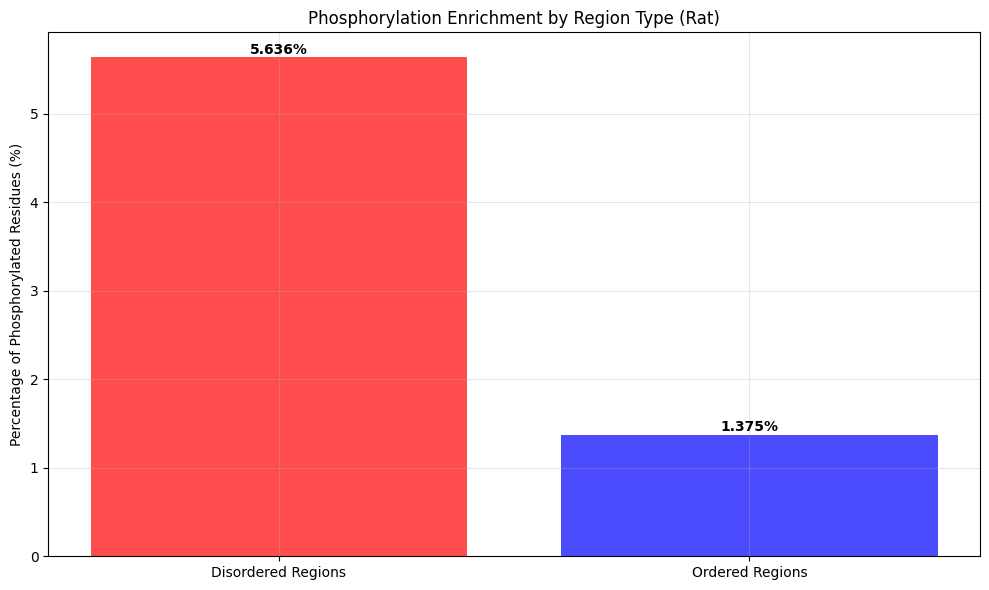


SUMMARY:
Phosphorylation enrichment in disordered regions: 5.636%
Phosphorylation enrichment in ordered regions: 1.375%
Enrichment ratio: 4.10x


In [13]:
# Calculate phosphorylation enrichment for rat data using values from previous cells
print("Calculating phosphorylation enrichment for rat data...")
print("=" * 60)

# Use values from previous cells (assuming they were run)
# From cell 2: disordered_count_rat, ordered_count_rat
# From cell 4: total_sty_disordered_rat, total_sty_ordered_rat

print(f"Using values from previous cells:")
print(f"Phosphorylated sites in disordered regions: {disordered_count_rat}")
print(f"Phosphorylated sites in ordered regions: {ordered_count_rat}")
print(f"Total S/T/Y residues in disordered regions: {total_sty_disordered_rat}")
print(f"Total S/T/Y residues in ordered regions: {total_sty_ordered_rat}")

# Calculate enrichment percentages
print("\nCalculating phosphorylation enrichment...")

# Percentage of phosphorylated residues in disordered regions
if total_sty_disordered_rat > 0:
    phospho_in_disordered_pct_rat = (disordered_count_rat / total_sty_disordered_rat) * 100
    print(f"Percentage of phosphorylated residues in disordered regions: {phospho_in_disordered_pct_rat:.3f}%")
    print(f"  ({disordered_count_rat} phosphorylated out of {total_sty_disordered_rat} total S/T/Y residues)")
else:
    phospho_in_disordered_pct_rat = 0
    print("No S/T/Y residues found in disordered regions")

# Percentage of phosphorylated residues in ordered regions
if total_sty_ordered_rat > 0:
    phospho_in_ordered_pct_rat = (ordered_count_rat / total_sty_ordered_rat) * 100
    print(f"Percentage of phosphorylated residues in ordered regions: {phospho_in_ordered_pct_rat:.3f}%")
    print(f"  ({ordered_count_rat} phosphorylated out of {total_sty_ordered_rat} total S/T/Y residues)")
else:
    phospho_in_ordered_pct_rat = 0
    print("No S/T/Y residues found in ordered regions")

# Calculate enrichment ratio
if phospho_in_ordered_pct_rat > 0:
    enrichment_ratio_rat = phospho_in_disordered_pct_rat / phospho_in_ordered_pct_rat
    print(f"\nEnrichment ratio (disordered/ordered): {enrichment_ratio_rat:.2f}x")
    if enrichment_ratio_rat > 1:
        print(f"→ Phosphorylation is {enrichment_ratio_rat:.2f}x more enriched in disordered regions")
    elif enrichment_ratio_rat < 1:
        print(f"→ Phosphorylation is {1/enrichment_ratio_rat:.2f}x more enriched in ordered regions")
    else:
        print("→ Phosphorylation shows equal enrichment in both regions")

# Create visualization
print("\nCreating visualization...")
plt.figure(figsize=(10, 6))

# Comparison of phosphorylation percentages
categories = ['Disordered Regions', 'Ordered Regions']
phospho_percentages = [phospho_in_disordered_pct_rat, phospho_in_ordered_pct_rat]

bars = plt.bar(categories, phospho_percentages, color=['red', 'blue'], alpha=0.7)
plt.ylabel('Percentage of Phosphorylated Residues (%)')
plt.title('Phosphorylation Enrichment by Region Type (Rat)')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, pct in zip(bars, phospho_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{pct:.3f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nSUMMARY:")
print(f"Phosphorylation enrichment in disordered regions: {phospho_in_disordered_pct_rat:.3f}%")
print(f"Phosphorylation enrichment in ordered regions: {phospho_in_ordered_pct_rat:.3f}%")
print(f"Enrichment ratio: {enrichment_ratio_rat:.2f}x")


In [ ]:
# Count S, T, Y residues individually in ordered/disordered regions for mouse data
print("Analyzing S, T, Y residues individually from PUNCH2 results (Mouse)...")
print("=" * 70)

punch2_dir = "../outputs/punch2/Punch2_results_mouse"
punch2_files = glob.glob(os.path.join(punch2_dir, "*.csv"))

if not punch2_files:
    print(f"Error: No PUNCH2 files found in {punch2_dir}")
else:
    print(f"Found {len(punch2_files)} PUNCH2 result files")
    
    # Initialize counters for each amino acid type
    # Disordered regions
    s_disordered = 0
    t_disordered = 0
    y_disordered = 0
    
    # Ordered regions
    s_ordered = 0
    t_ordered = 0
    y_ordered = 0
    
    # Totals
    s_total = 0
    t_total = 0
    y_total = 0
    
    files_processed = 0
    
    for file_path in punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    
                    # Count each amino acid type individually
                    if amino_acid == 'S':
                        s_total += 1
                        if disorder_prediction == '1':
                            s_disordered += 1
                        elif disorder_prediction == '0':
                            s_ordered += 1
                    elif amino_acid == 'T':
                        t_total += 1
                        if disorder_prediction == '1':
                            t_disordered += 1
                        elif disorder_prediction == '0':
                            t_ordered += 1
                    elif amino_acid == 'Y':
                        y_total += 1
                        if disorder_prediction == '1':
                            y_disordered += 1
                        elif disorder_prediction == '0':
                            y_ordered += 1
            
            files_processed += 1
            if files_processed % 1000 == 0:
                print(f"Processed {files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {files_processed} PUNCH2 files")
    print("\n" + "="*70)
    print("INDIVIDUAL AMINO ACID COUNTS BY DISORDER STATUS")
    print("="*70)
    
    # Serine (S) counts
    print(f"\nSERINE (S):")
    print(f"  Total S residues: {s_total:,}")
    print(f"  S in disordered regions: {s_disordered:,} ({s_disordered/s_total*100:.1f}%)")
    print(f"  S in ordered regions: {s_ordered:,} ({s_ordered/s_total*100:.1f}%)")
    
    # Threonine (T) counts
    print(f"\nTHREONINE (T):")
    print(f"  Total T residues: {t_total:,}")
    print(f"  T in disordered regions: {t_disordered:,} ({t_disordered/t_total*100:.1f}%)")
    print(f"  T in ordered regions: {t_ordered:,} ({t_ordered/t_total*100:.1f}%)")
    
    # Tyrosine (Y) counts
    print(f"\nTYROSINE (Y):")
    print(f"  Total Y residues: {y_total:,}")
    print(f"  Y in disordered regions: {y_disordered:,} ({y_disordered/y_total*100:.1f}%)")
    print(f"  Y in ordered regions: {y_ordered:,} ({y_ordered/y_total*100:.1f}%)")
    
    # Summary
    print(f"\nSUMMARY:")
    print(f"  Total S/T/Y residues: {s_total + t_total + y_total:,}")
    print(f"  Total in disordered regions: {s_disordered + t_disordered + y_disordered:,}")
    print(f"  Total in ordered regions: {s_ordered + t_ordered + y_ordered:,}")
    
    # Calculate percentages for each amino acid
    s_disordered_pct = s_disordered/s_total*100 if s_total > 0 else 0
    s_ordered_pct = s_ordered/s_total*100 if s_total > 0 else 0
    
    t_disordered_pct = t_disordered/t_total*100 if t_total > 0 else 0
    t_ordered_pct = t_ordered/t_total*100 if t_total > 0 else 0
    
    y_disordered_pct = y_disordered/y_total*100 if y_total > 0 else 0
    y_ordered_pct = y_ordered/y_total*100 if y_total > 0 else 0
    
    # Show detailed breakdown
    print(f"\n" + "="*70)
    print("DETAILED BREAKDOWN WITH PERCENTAGES")
    print("="*70)
    
    print(f"\nSERINE (S) - Total: {s_total:,}")
    print(f"  Disordered: {s_disordered:,} ({s_disordered_pct:.1f}%)")
    print(f"  Ordered: {s_ordered:,} ({s_ordered_pct:.1f}%)")
    
    print(f"\nTHREONINE (T) - Total: {t_total:,}")
    print(f"  Disordered: {t_disordered:,} ({t_disordered_pct:.1f}%)")
    print(f"  Ordered: {t_ordered:,} ({t_ordered_pct:.1f}%)")
    
    print(f"\nTYROSINE (Y) - Total: {y_total:,}")
    print(f"  Disordered: {y_disordered:,} ({y_disordered_pct:.1f}%)")
    print(f"  Ordered: {y_ordered:,} ({y_ordered_pct:.1f}%)")
    
    # Show comparison between amino acids
    print(f"\n" + "="*70)
    print("COMPARISON: DISORDERED REGION PREFERENCES")
    print("="*70)
    print(f"S: {s_disordered_pct:.1f}% in disordered regions")
    print(f"T: {t_disordered_pct:.1f}% in disordered regions") 
    print(f"Y: {y_disordered_pct:.1f}% in disordered regions")
    
    # Identify which amino acid is most disordered
    max_disordered = max(s_disordered_pct, t_disordered_pct, y_disordered_pct)
    if max_disordered == s_disordered_pct:
        most_disordered = "S (Serine)"
    elif max_disordered == t_disordered_pct:
        most_disordered = "T (Threonine)"
    else:
        most_disordered = "Y (Tyrosine)"
    
    print(f"\n→ {most_disordered} shows the highest preference for disordered regions ({max_disordered:.1f}%)")
    
    # Create visualization showing percentages
    print(f"\nCreating visualization...")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Percentages in disordered regions
    amino_acids = ['S', 'T', 'Y']
    disordered_pcts = [s_disordered_pct, t_disordered_pct, y_disordered_pct]
    ordered_pcts = [s_ordered_pct, t_ordered_pct, y_ordered_pct]
    
    x = np.arange(len(amino_acids))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, disordered_pcts, width, label='Disordered', color='red', alpha=0.7)
    bars2 = ax1.bar(x + width/2, ordered_pcts, width, label='Ordered', color='blue', alpha=0.7)
    
    ax1.set_xlabel('Amino Acid Type')
    ax1.set_ylabel('Percentage (%)')
    ax1.set_title('S/T/Y Residues: % in Disordered vs Ordered Regions (Mouse)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(amino_acids)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 100)
    
    # Add value labels
    for bar, pct in zip(bars1, disordered_pcts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    for bar, pct in zip(bars2, ordered_pcts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Plot 2: Stacked bar chart showing the distribution
    ax2.bar(amino_acids, disordered_pcts, label='Disordered', color='red', alpha=0.7)
    ax2.bar(amino_acids, ordered_pcts, bottom=disordered_pcts, label='Ordered', color='blue', alpha=0.7)
    
    ax2.set_xlabel('Amino Acid Type')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title('S/T/Y Residues: Distribution by Region Type (Mouse)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 100)
    
    # Add value labels for stacked bars
    for i, (dis_pct, ord_pct) in enumerate(zip(disordered_pcts, ordered_pcts)):
        # Label for disordered portion
        ax2.text(i, dis_pct/2, f'{dis_pct:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='white')
        # Label for ordered portion
        ax2.text(i, dis_pct + ord_pct/2, f'{ord_pct:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='white')
    
    plt.tight_layout()
    plt.show()


Analyzing S, T, Y residues individually from PUNCH2 results (Mouse)...
Found 6015 PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...
Processed 6000 files...

Processed 6015 PUNCH2 files

INDIVIDUAL AMINO ACID COUNTS BY DISORDER STATUS

SERINE (S):
  Total S residues: 435,125
  S in disordered regions: 178,525 (41.0%)
  S in ordered regions: 256,600 (59.0%)

THREONINE (T):
  Total T residues: 255,792
  T in disordered regions: 72,638 (28.4%)
  T in ordered regions: 183,154 (71.6%)

TYROSINE (Y):
  Total Y residues: 115,116
  Y in disordered regions: 12,972 (11.3%)
  Y in ordered regions: 102,144 (88.7%)

SUMMARY:
  Total S/T/Y residues: 806,033
  Total in disordered regions: 264,135
  Total in ordered regions: 541,898

DETAILED BREAKDOWN WITH PERCENTAGES

SERINE (S) - Total: 435,125
  Disordered: 178,525 (41.0%)
  Ordered: 256,600 (59.0%)

THREONINE (T) - Total: 255,792
  Disordered: 72,638 (28.4%)
